In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

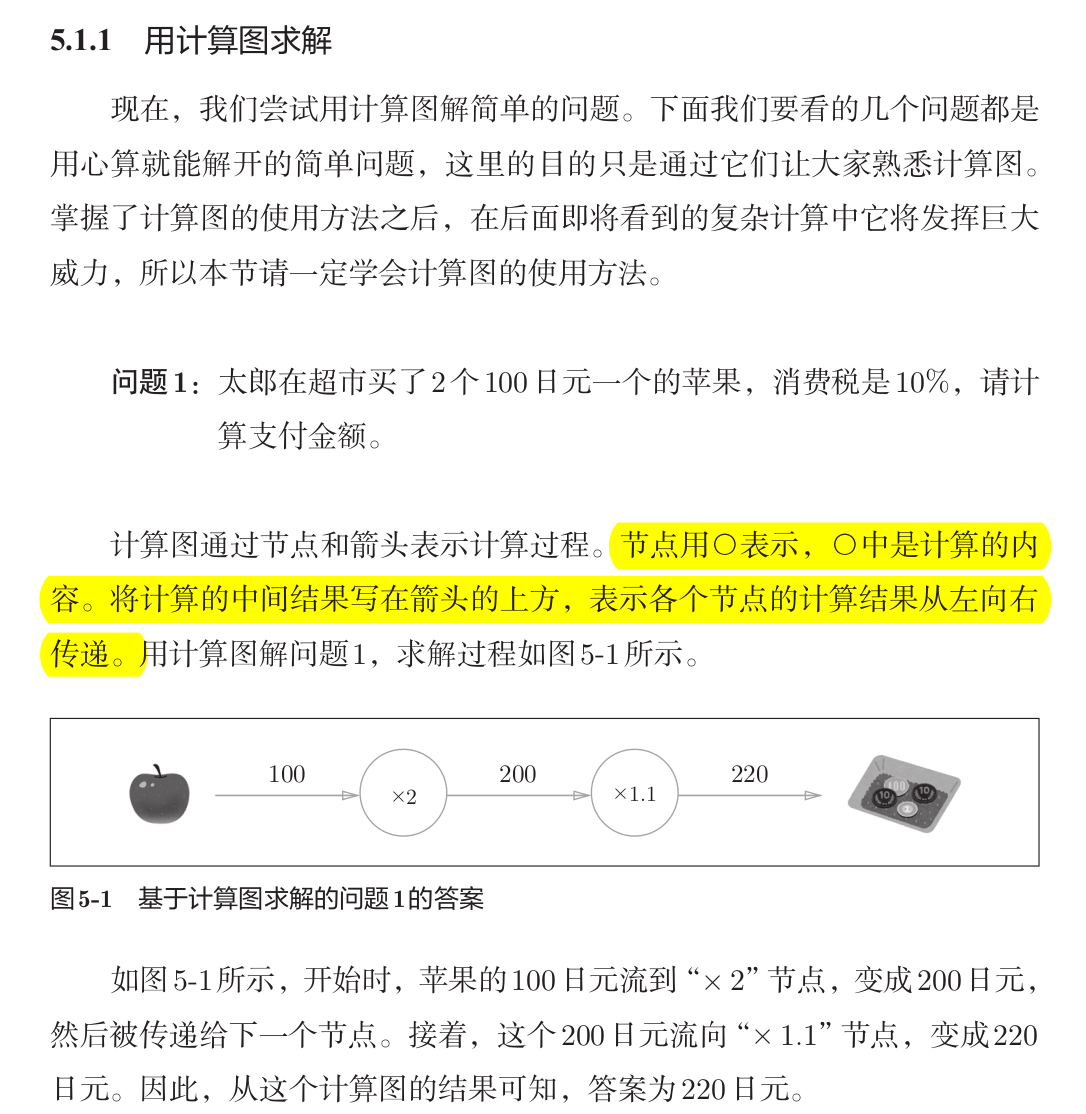


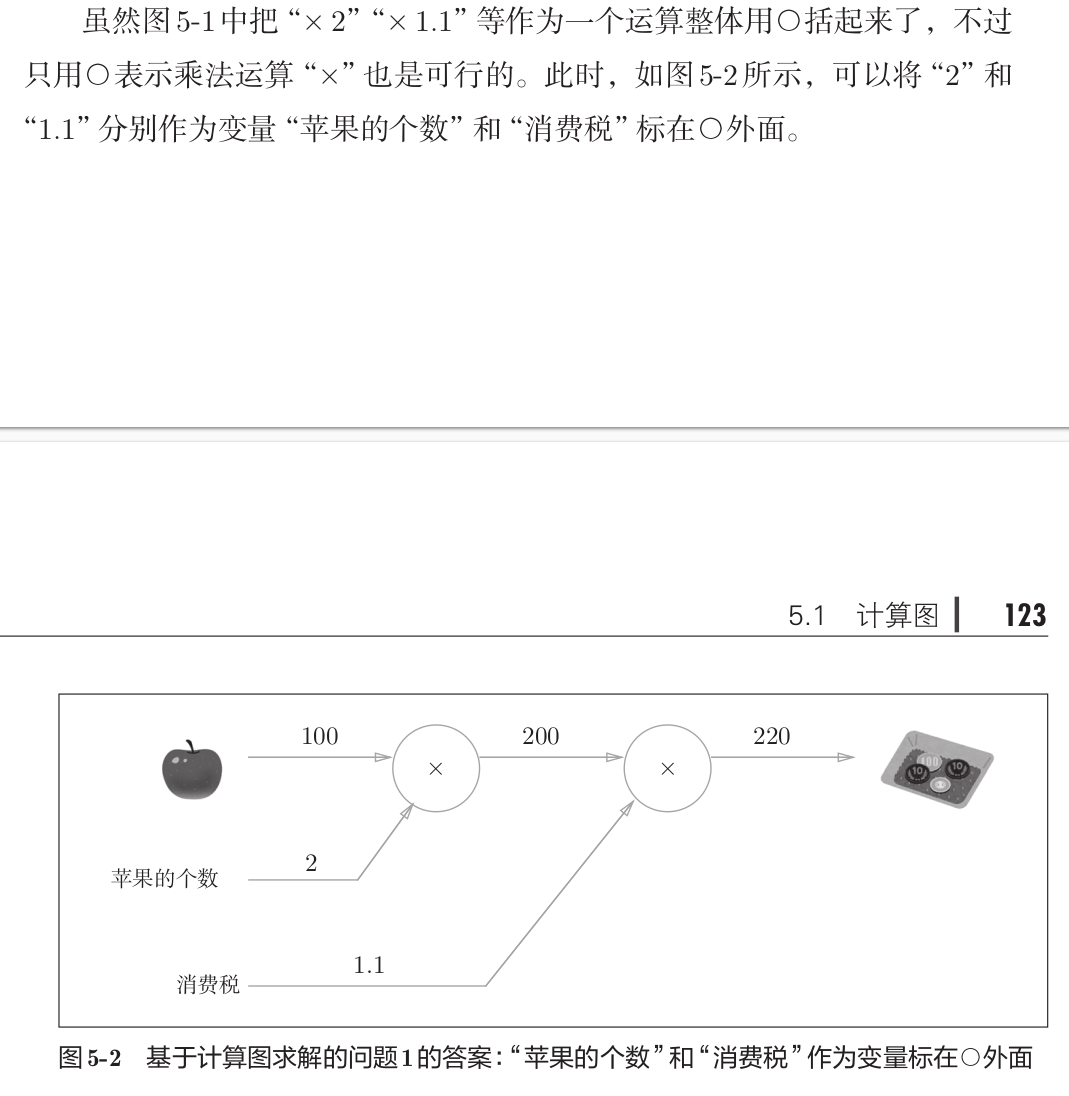
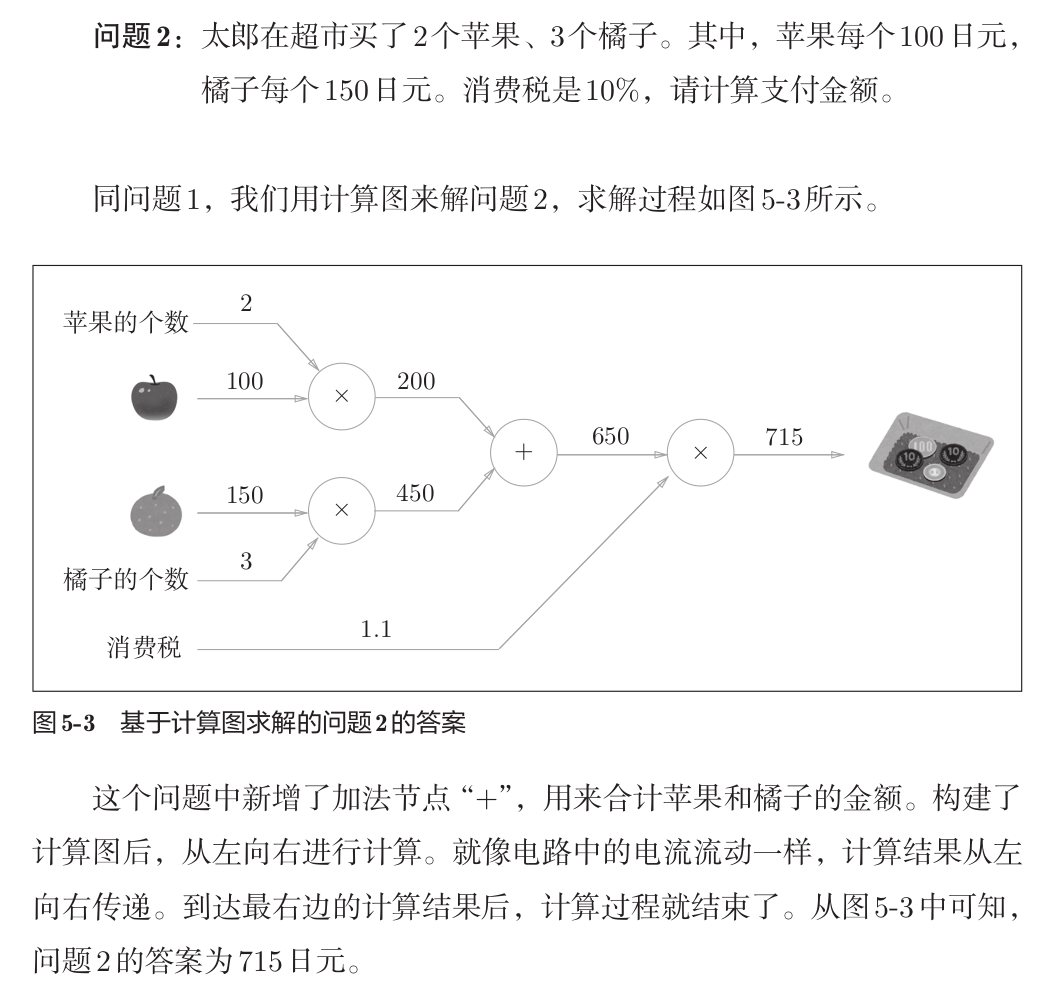

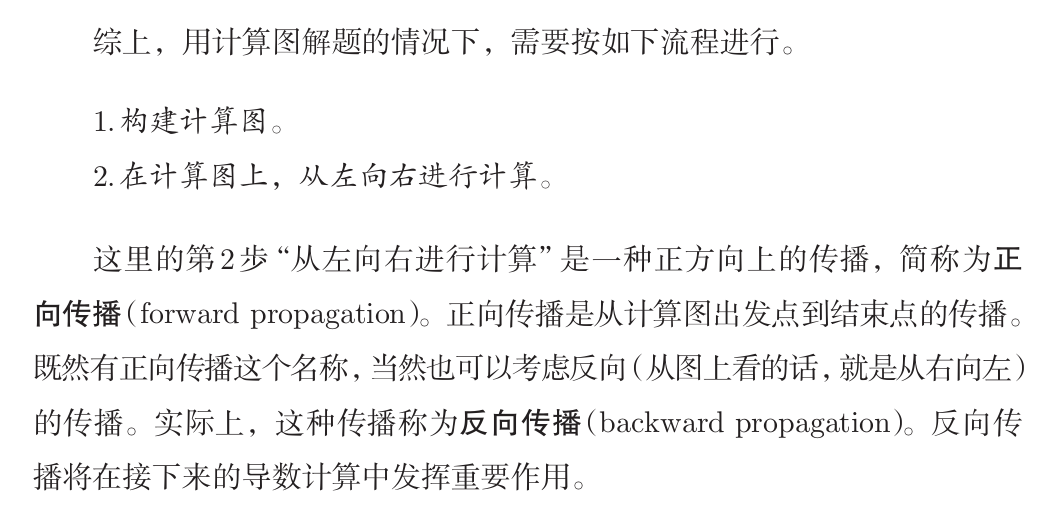
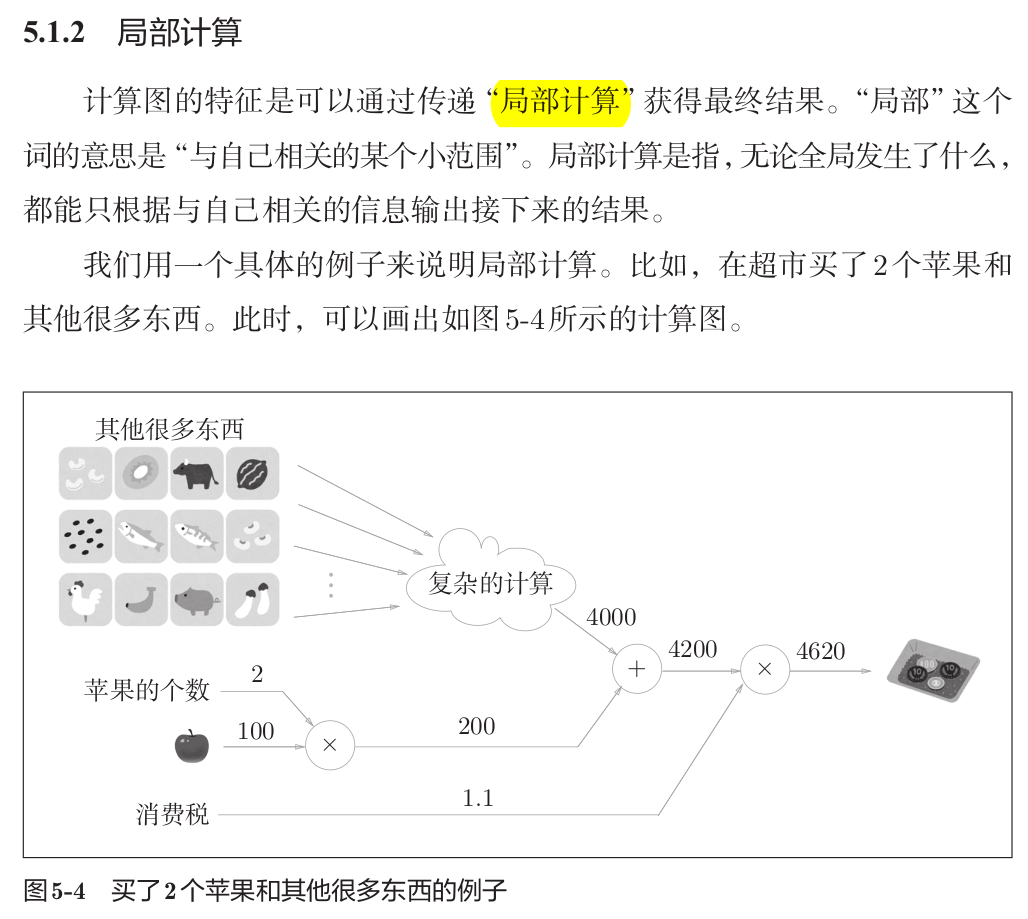

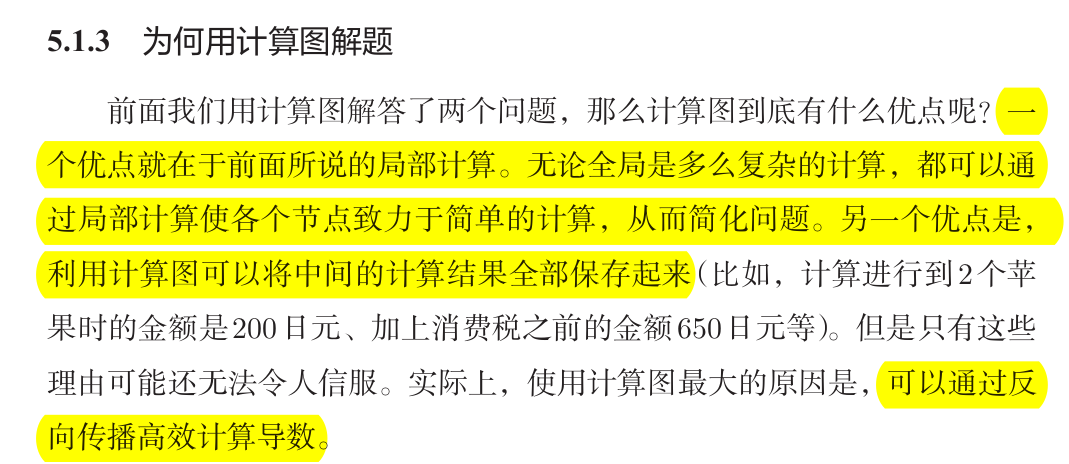

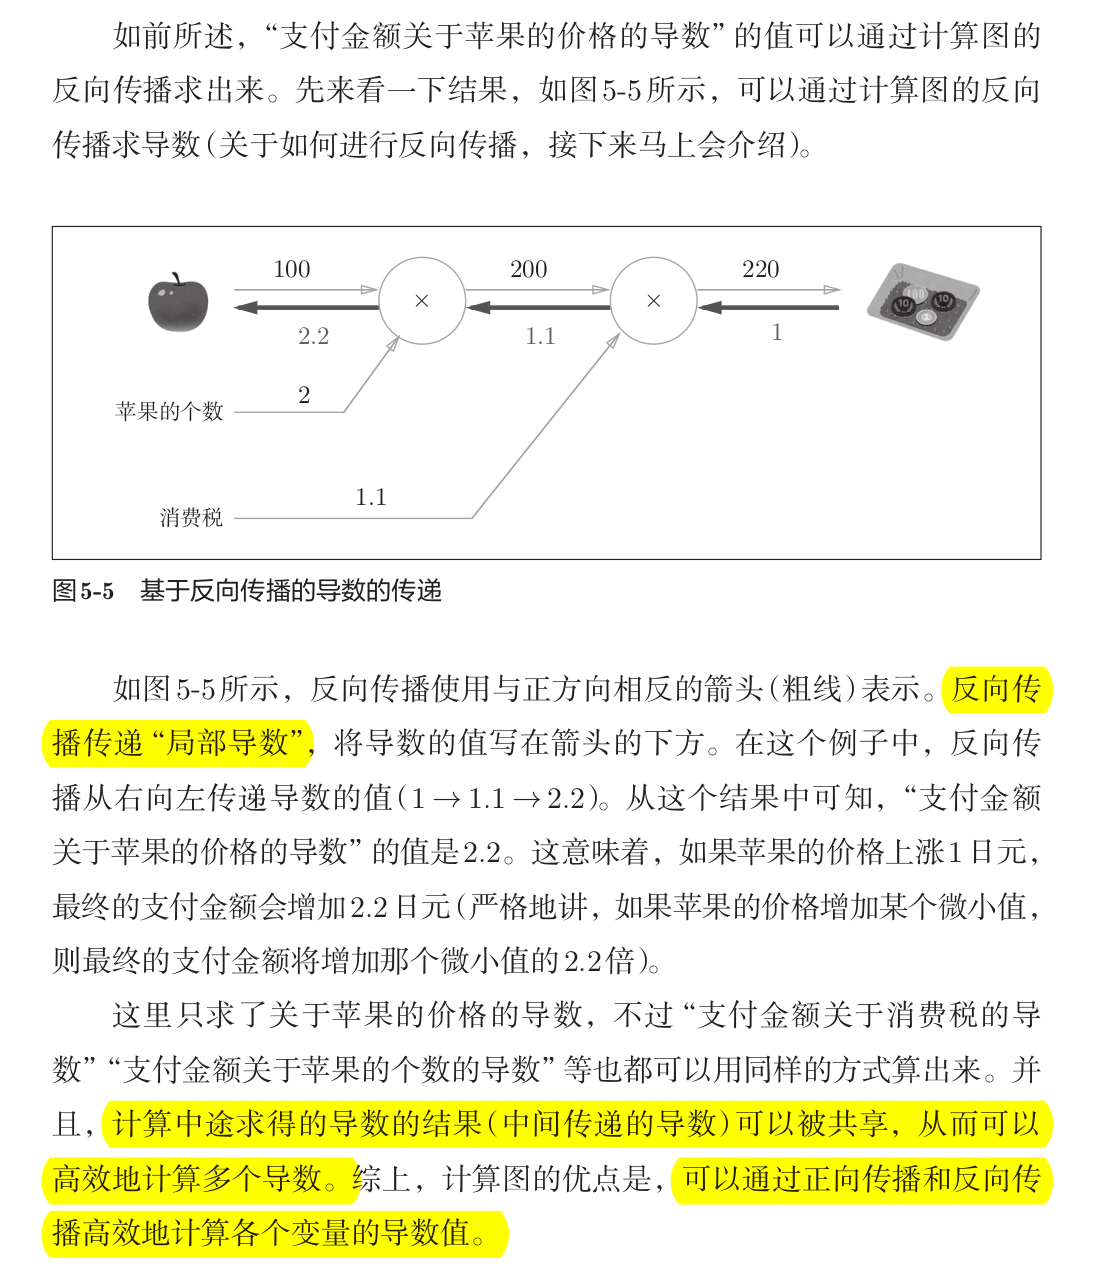

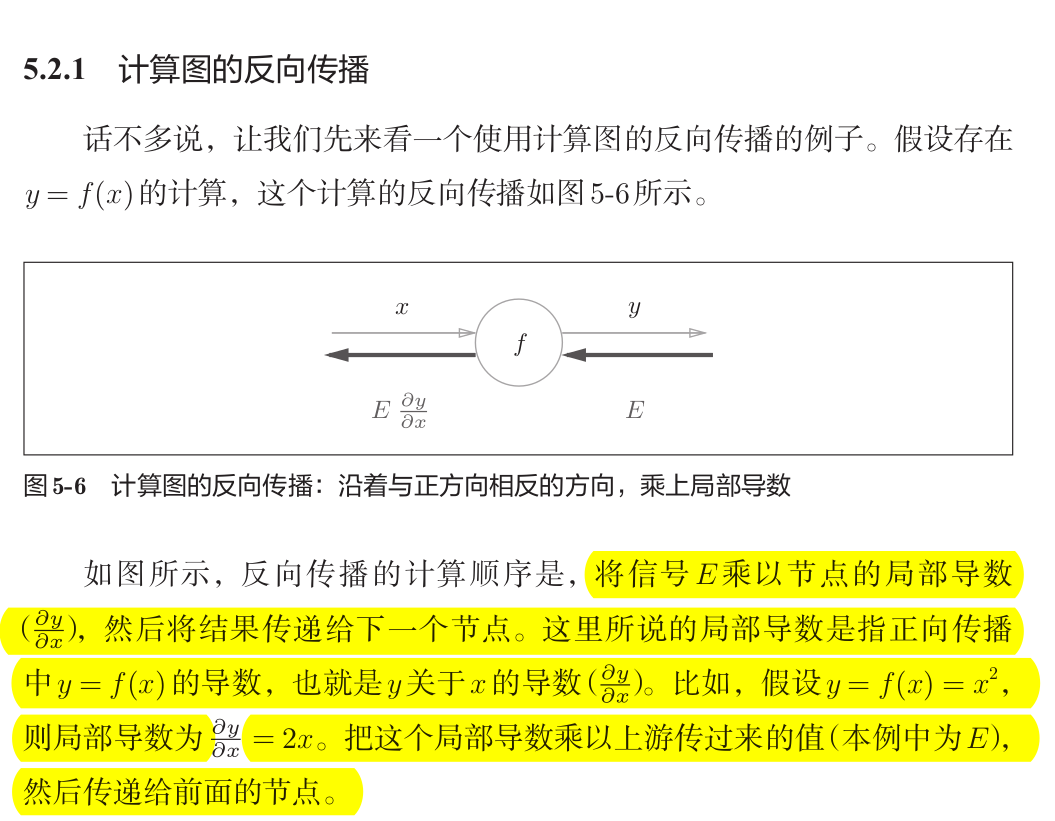

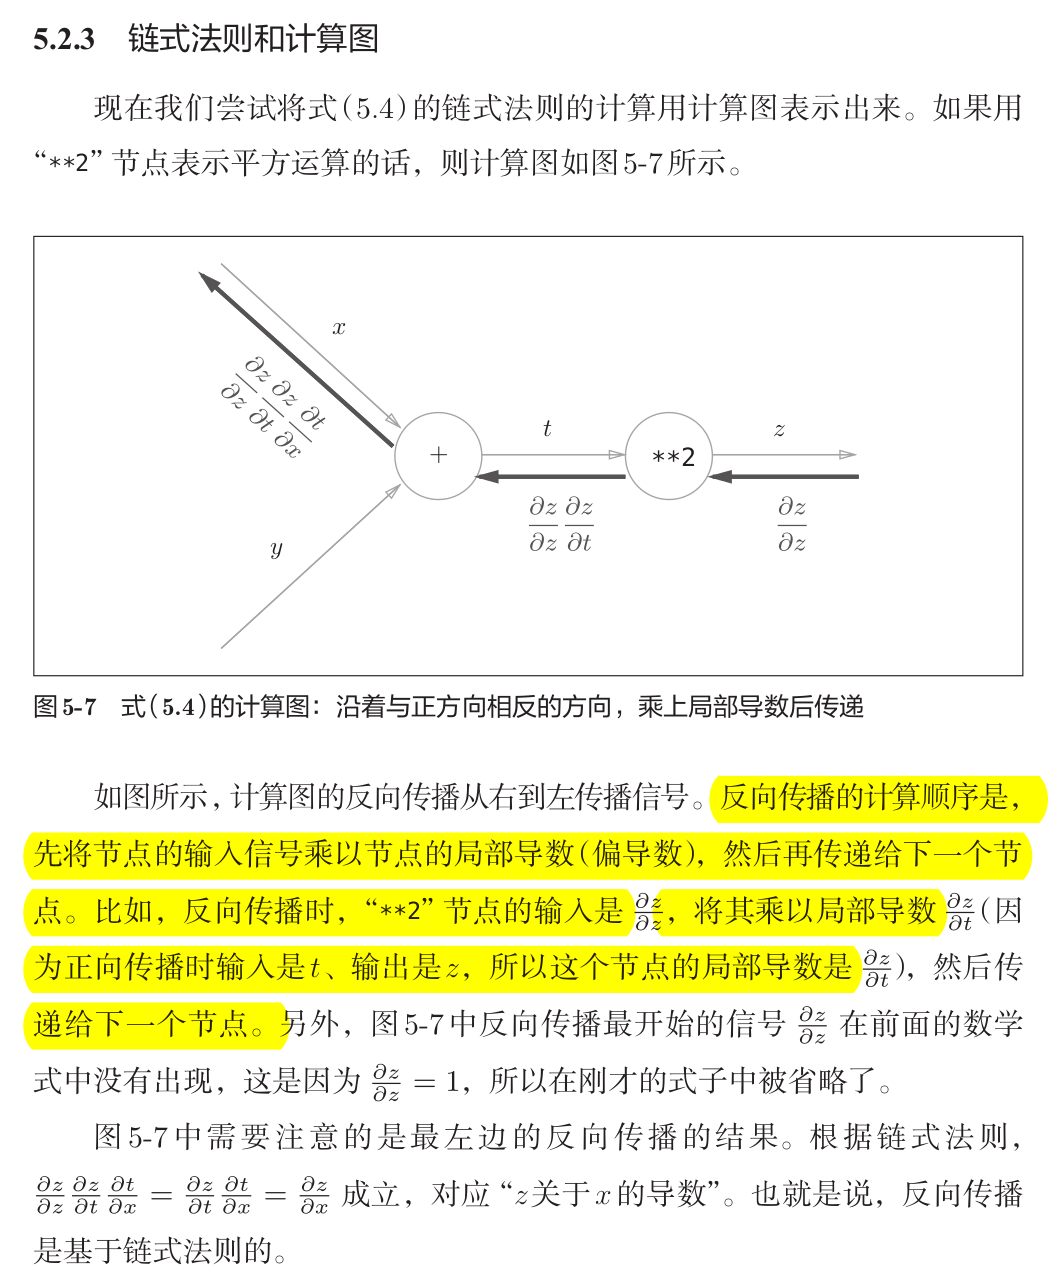

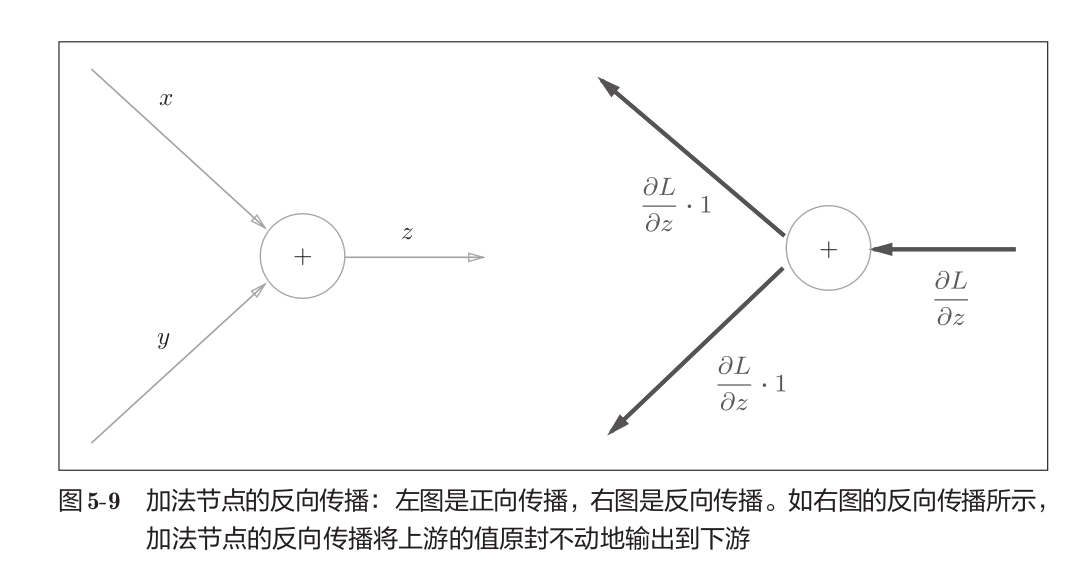
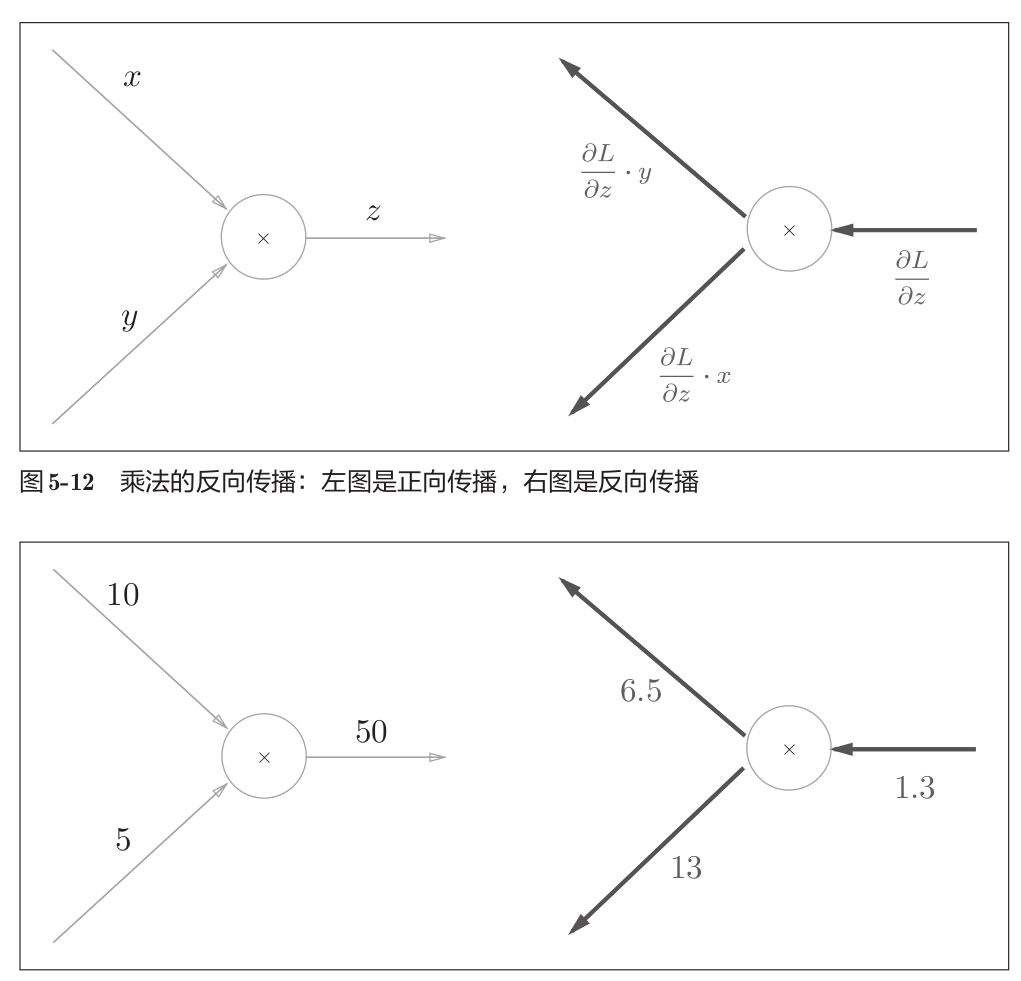

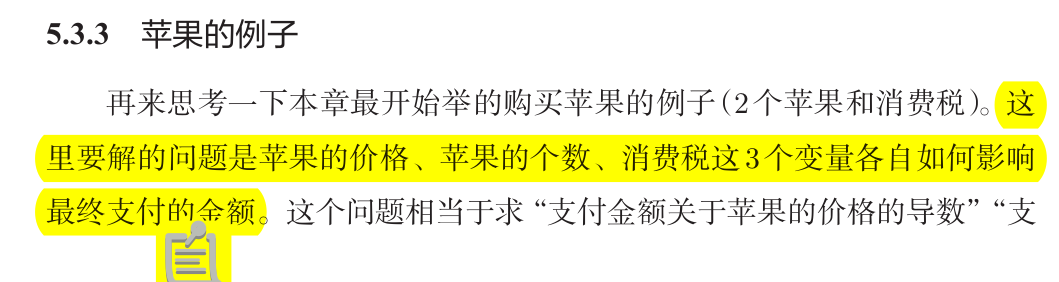
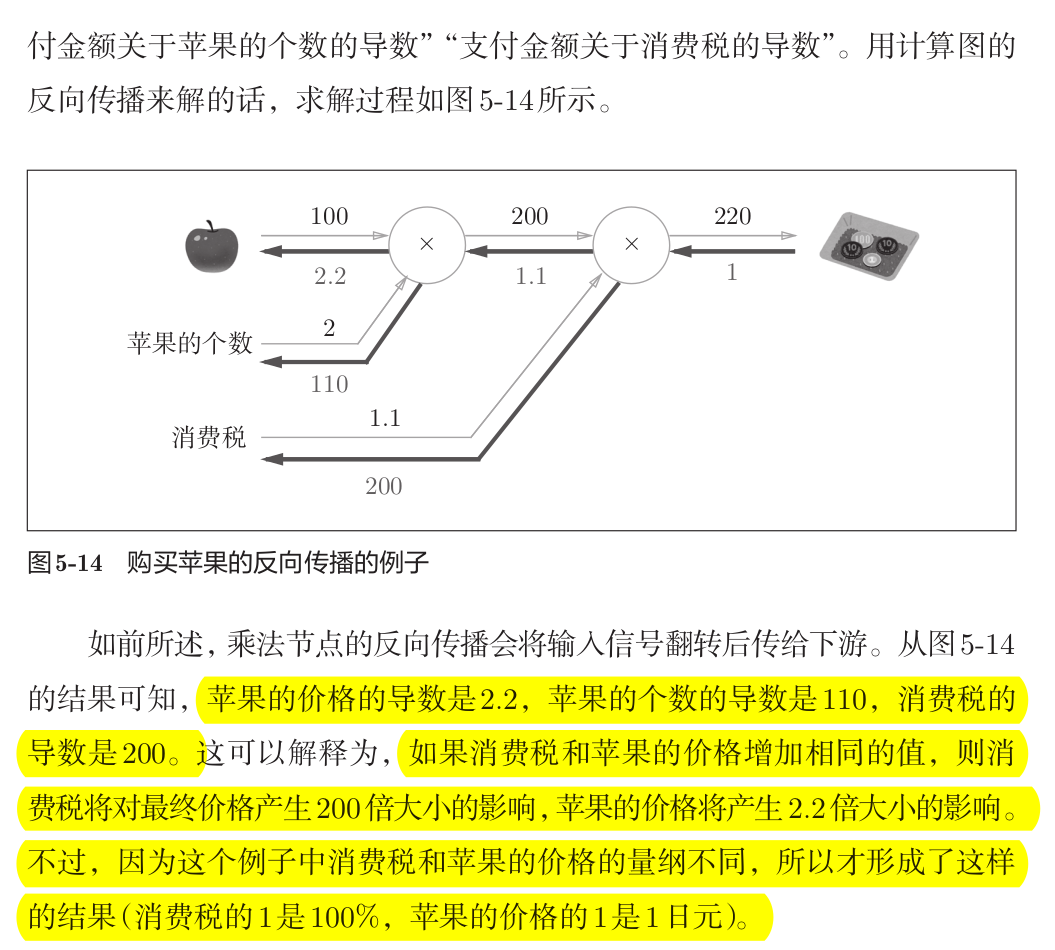

计算图就是计算计算图中参与的每个变量如何影响最终值的，换句话说就是最终的f分别对所有变量求偏导

In [2]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y): 
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

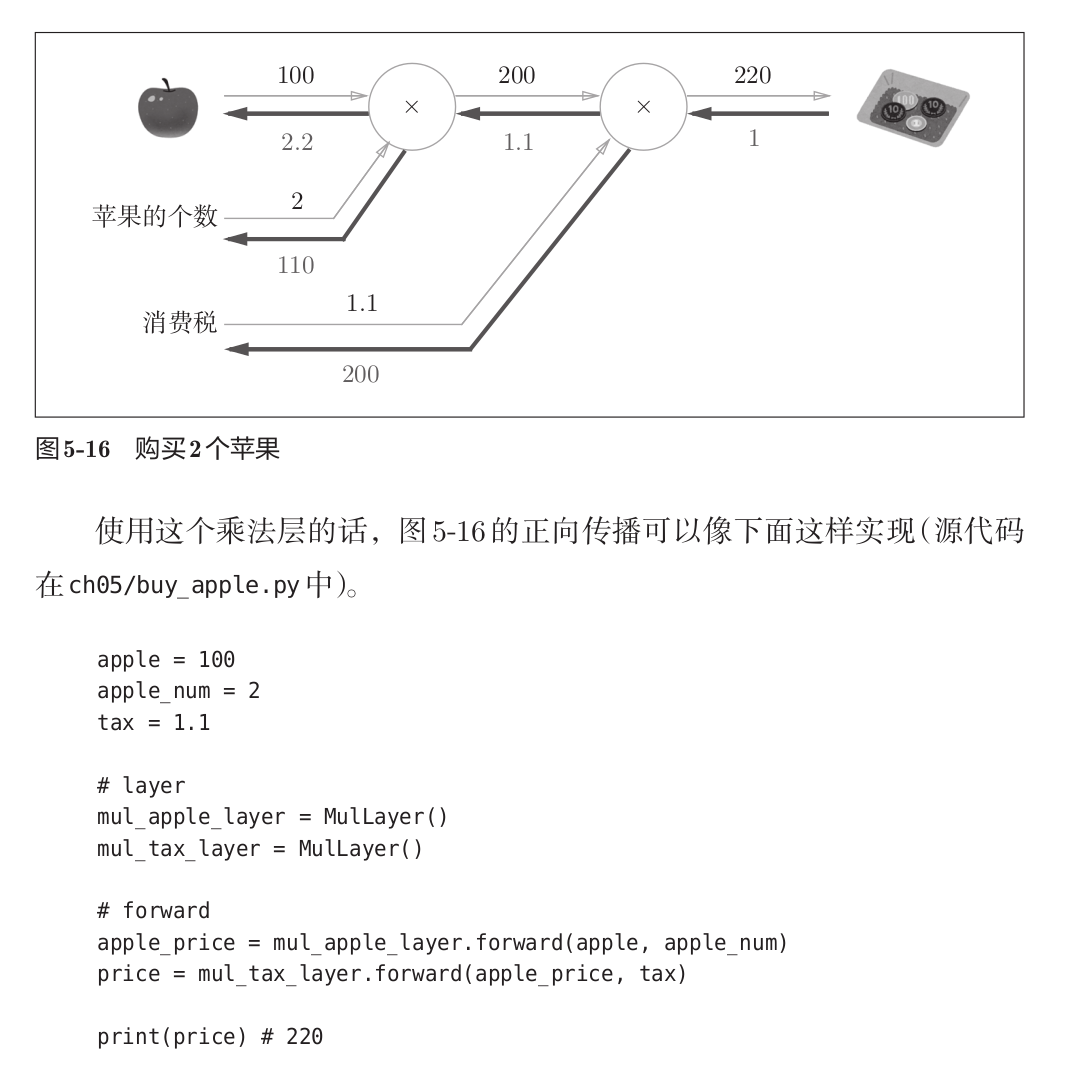

In [3]:
apple = 100
apple_num = 2
tax = 1.1
# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()
# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price) # 220

220.00000000000003


In [4]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax) # 2.2 110 200

2.2 110.00000000000001 200


In [7]:
class AddLayer:
    def __init__(self) -> None:
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y

        return x+y
    
    def backward(self, dout):
        dx = dout
        dy = dout

        return dx, dy
        

In [8]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1
# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()
# forward
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)
# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)
print(price) # 715
print(dapple_num, dapple, dorange, dorange_num, dtax) # 110 2.2 3.3 165 650

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


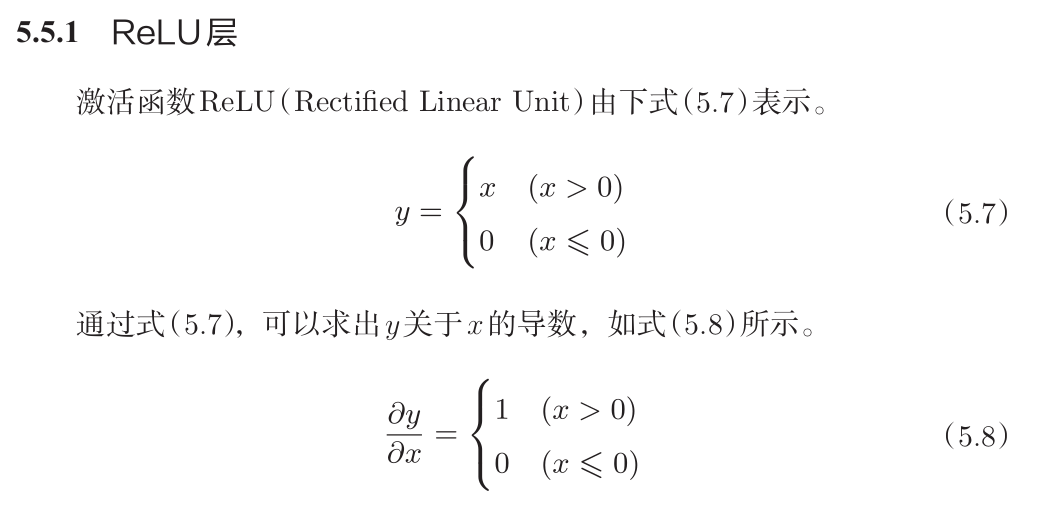

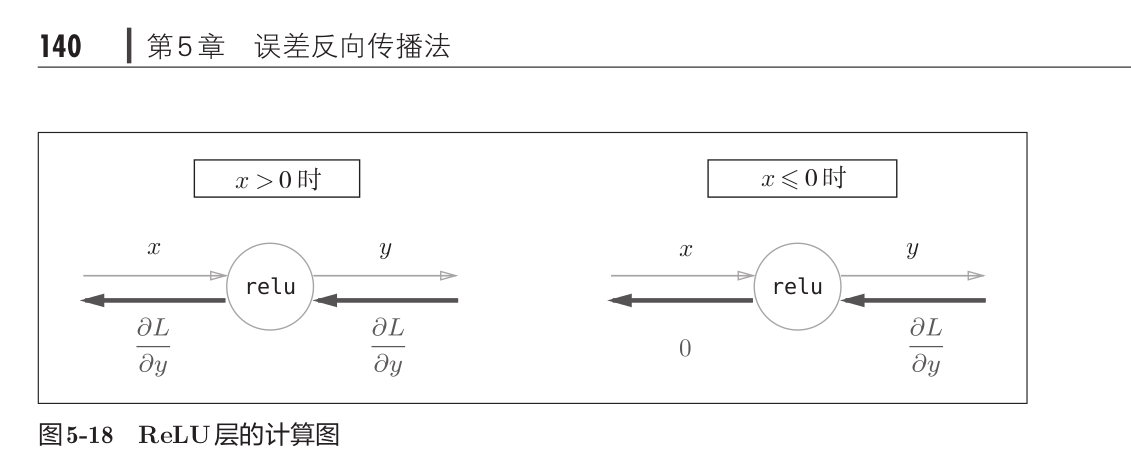

relu的实现还需要多看看

In [9]:
class Relu:
    def __init__(self):
        self.x = mask = None

    def forwad(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [12]:
x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
mask = (x <= 0)
print(mask)
x[mask] = 0
print(x)

[[False  True]
 [ True False]]
[[1. 0.]
 [0. 3.]]


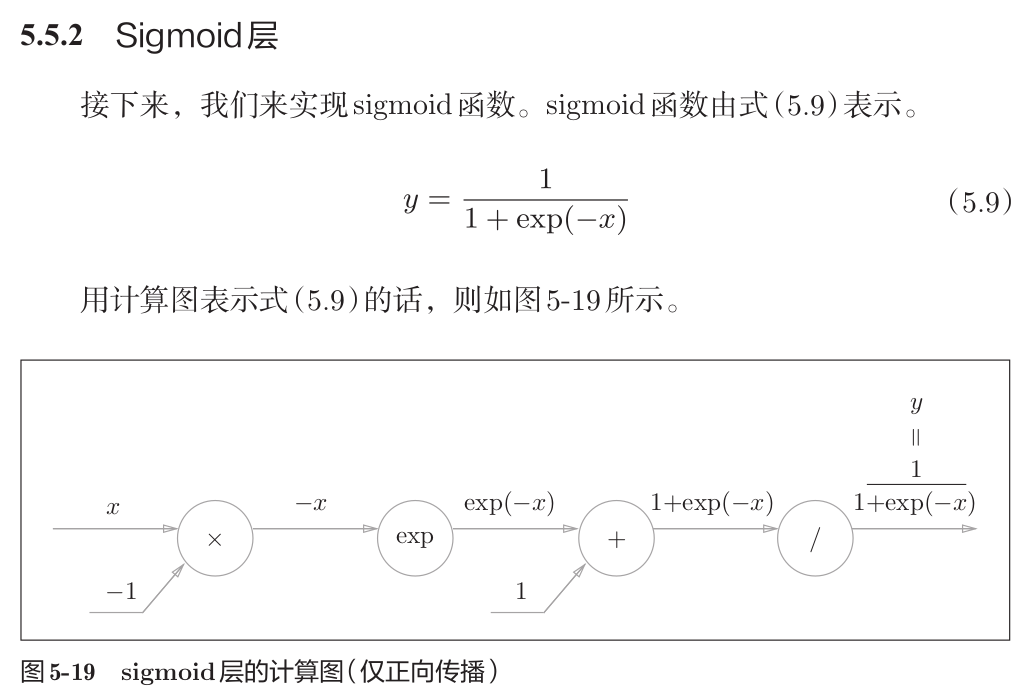

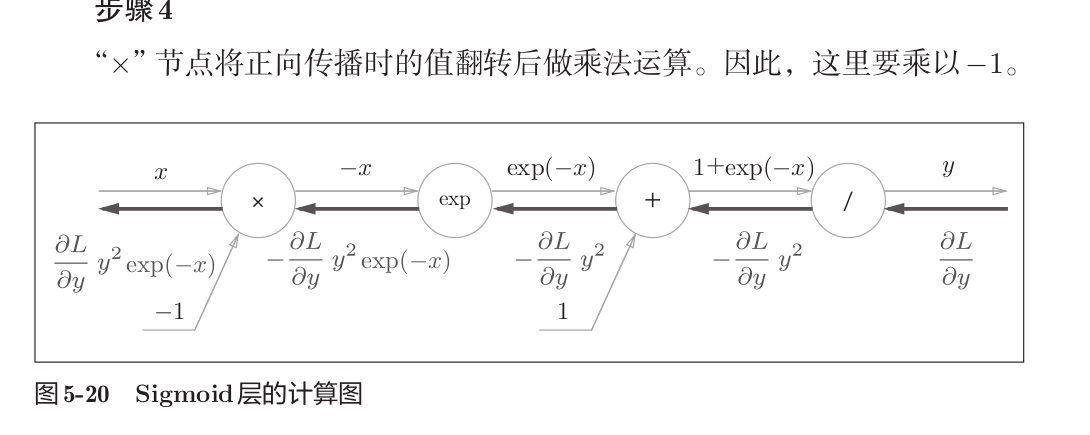

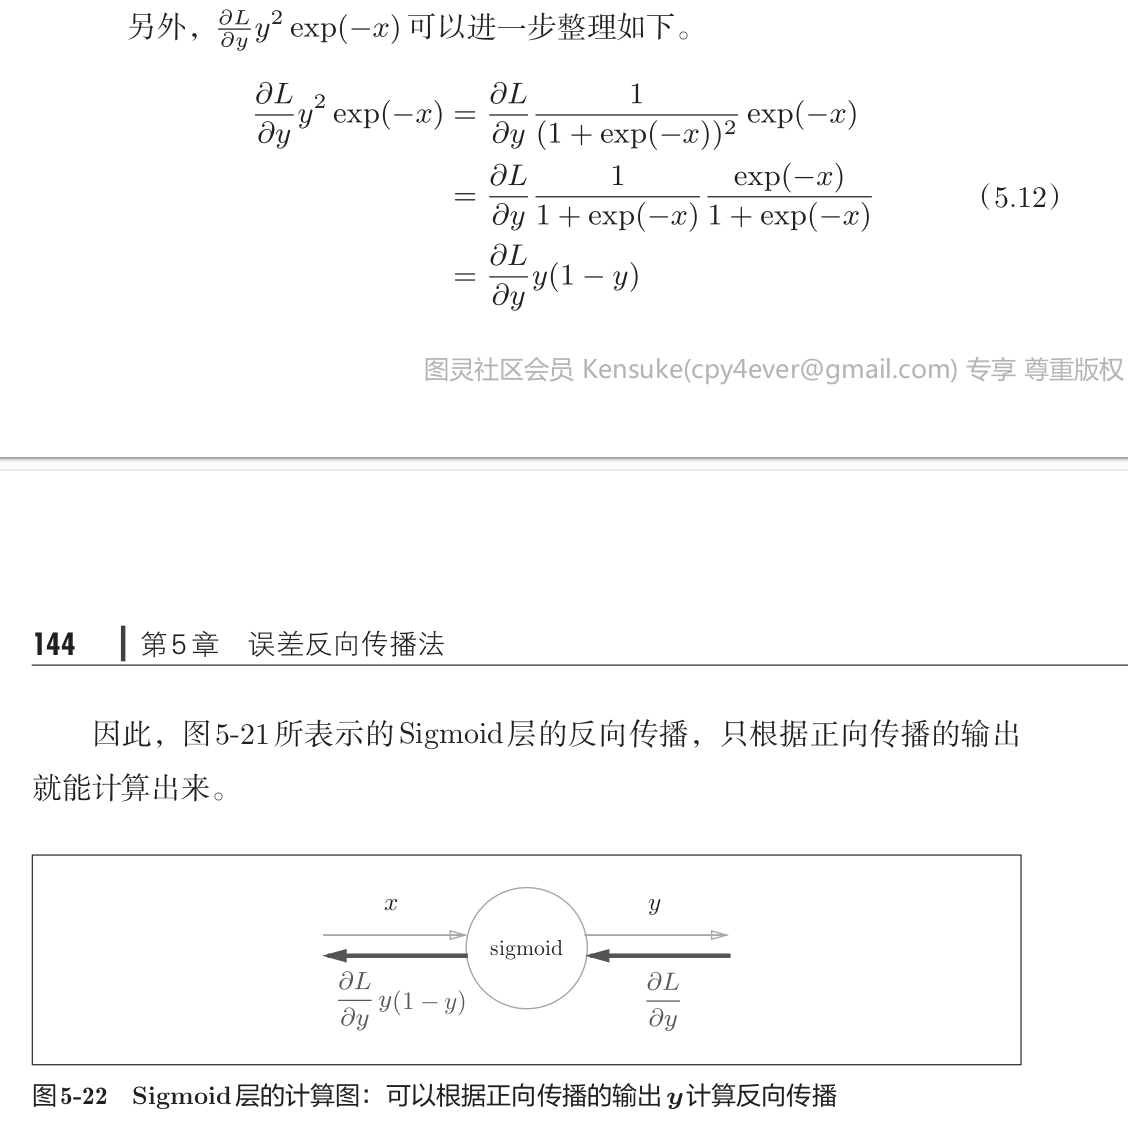

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out
    
    def backward(self, dout):
        return dout * self.out * (1 - self.out)
    